# Exercice 1

## Implémenter une procédure basée sur un classifier SVM à noyau RBF et le jeu de données "moons" pour illustrer cette différence. Vous générez le jeu de données grâce à la commande ci-dessous :


In [3]:
# generic imports #
#-----------------#
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
#importation des données
from sklearn.datasets import make_moons
X, y = make_moons(500, noise = 0.6, random_state = 27)

Prise de connaissance des données 

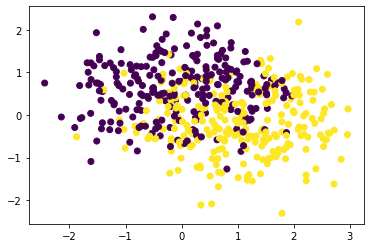

In [5]:
#affichage du plot
# plot
fig = plt.figure()
plt.scatter(X[:,0], X[:,1], c = y)
plt.show()


Nous voyons la répartion des points de notre jeu de données. Avec l'affectation des couleurs nous pouvons qu'une tendance se dégage entre les deux groupes.

## Mise en place du modèle de décision avec un classifier SVM à noyau RBF

In [8]:
#mdoèle décision
def show_model_decision(X, y, model) : 
    # define (x,y) grid
    x0_min = np.min(X[:,0])
    x0_max = np.max(X[:,0])
    x1_min = np.min(X[:,1])
    x1_max = np.max(X[:,1])
    xx, yy = np.meshgrid(np.linspace(x0_min-1, x0_max+1, 200), np.linspace(x1_min-1, x1_max+1, 200))
    # evaluate decision function in a grid
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]) # the ravel() function converts a 2D array in 1D
    Z = Z.reshape(xx.shape)
    # plot model score
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.RdBu)
    plt.colorbar()
    # plot classification boundary
    plt.contour(xx, yy, Z, 0, colors = 'k')
    # show data points
    plt.scatter(X[:,0], X[:,1], c = y)



D:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


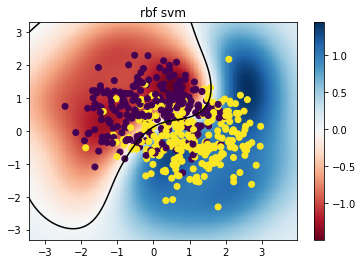

In [9]:
from sklearn.svm import SVC
# rbf model
svm_rbf = SVC(kernel = 'rbf')
svm_rbf.fit(X, y)
show_model_decision(X,y,svm_rbf)
plt.title('rbf svm')
# show figure
plt.show()

Voici le résultat d'un premier classifier SVM avec noyau RBF

Nous allons maintenant mettre en place les deux codes de la question 1 pour montrer les différences.
Première étape, initialiser les grilles des hyperparamètres.

In [11]:
from sklearn.model_selection import GridSearchCV
#code 1
# instantiate model
svm_rbf = SVC(kernel = 'rbf')
# define grid of parameter
C_grid = np.logspace(-3,3, 10)
gamma_grid = [0.1, 0.25, 0.5, 0.75, 1, 2]
param_grid = {'C' : C_grid,
             'gamma' : gamma_grid}

Avec le grid_search, cela permet de trouver la meilleur configuration du modèle. Le score de ce modèle est ensuite retourner.

In [20]:
# optimise parameter
grid_search_rbf = GridSearchCV(svm_rbf, param_grid, cv= 10)
grid_search_rbf.fit(X,y)
# show results
print("The best parameters are %s with an accuracy of %0.2f"
     % (grid_search_rbf.best_params_, grid_search_rbf.best_score_))

The best parameters are {'C': 0.1, 'gamma': 0.75} with an accuracy of 0.80


Nous utilisons un noyau RBF les valeurs des deux hyerparamètres sont C = 0.1 et Gamma = 0.75. L'accuracy de ce modèle est de 80%.

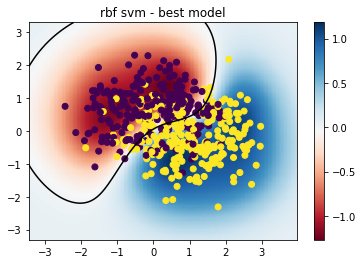

In [22]:
# show decision boundary
show_model_decision(X, y, grid_search_rbf.best_estimator_)
plt.title('rbf svm - best model')
# show figure
plt.show()
#resultat final du code 1 on aurait qu'une seule valeure
accuracy1 = grid_search_rbf.best_score_

Enfin, nous pouvons voir la représentation avec les hyperparamètres prédéfinies auparavant.

Nous allons maintenant mettre en place le code 2

In [23]:
from sklearn.model_selection import cross_val_score
cv_res = cross_val_score(grid_search_rbf, X, y, cv = 10) #logiquement un peu plus de temps à tourner


D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will cha

In [39]:
print(cv_res)
accuracy2 = cv_res.mean()
print(round(accuracy2,3))

[0.82 0.78 0.8  0.78 0.72 0.82 0.78 0.88 0.74 0.78]
0.79


Comme nous l'avions expliqué auparavant, dans cv_res, nous avons le score dans chacun des 10 folds.

In [40]:
print(accuracy1)

0.796


Nous voyons que les deux résulats obtenus dans le code 1 et 2 sont très proches. L'accuracy est légèrement meilleure dans le code 1 mais rien de significatif. Cependant, dans le code 2, une cross-validation est mise en place ce qui permet de tester le modèle sur les différentes folds. Il serait donc plus pertinent d'utiliser le code N°2.